In [1]:
import ppsim as pp
import numpy as np
import pickle
from matplotlib import pyplot as plt
# Uncomment this line to make all plots interactive
# %matplotlib widget

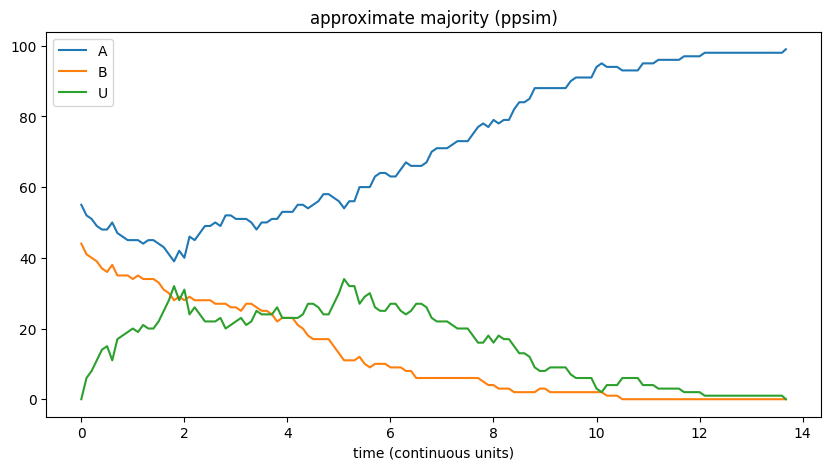

In [5]:
a,b,u = pp.species('A B U')
approx_majority = [
    a+b >> 2*u,
    a+u >> 2*a,
    b+u >> 2*b,
]
n = 10 ** 2
p = 0.55
init_config = {a: p*n, b: (1-p)*n}
sim = pp.Simulation(init_config, approx_majority, seed=2)
sim.run(20, 0.1)
sim.history.plot(figsize=(10,5)) # .plot(figsize = (6, 4))
plt.title('approximate majority (ppsim)')
plt.show()

In [10]:
from math import log
MAX = 1000
ln_fact = 0.0
max_error = 0.0
for i in range(1,MAX):
    # using the identity ln(k!) = ln((k-1)!) + ln(k)
    ln_fact += log(i)
    mplog = loggamma(i+1) if i > 0 else 0
    # print(f'log({i}!)            = {ln_fact}')
    # print(f'mpmath.loggamma({i}) = {mplog}')
    if i > 1:
        error = abs(ln_fact - mplog) / mplog
        max_error = max(error, max_error)
        print(f'error(ln({i}!)): {error}')
print(f'{max_error=}')

error(ln(2!)): 0.0
error(ln(3!)): 0.0
error(ln(4!)): 1.39736213908448e-16
error(ln(5!)): 0.0
error(ln(6!)): 0.0
error(ln(7!)): 0.0
error(ln(8!)): 0.0
error(ln(9!)): 1.38758067327818e-16
error(ln(10!)): 1.17605158810791e-16
error(ln(11!)): 0.0
error(ln(12!)): 1.77749314671717e-16
error(ln(13!)): 0.0
error(ln(14!)): 1.41029831504749e-16
error(ln(15!)): 1.27340733380522e-16
error(ln(16!)): 1.15829743175445e-16
error(ln(17!)): 0.0
error(ln(18!)): 0.0
error(ln(19!)): 0.0
error(ln(20!)): 0.0
error(ln(21!)): 0.0
error(ln(22!)): 0.0
error(ln(23!)): 0.0
error(ln(24!)): 1.29697224676733e-16
error(ln(25!)): 1.22499753770235e-16
error(ln(26!)): 1.15984818464906e-16
error(ln(27!)): 0.0
error(ln(28!)): 0.0
error(ln(29!)): 0.0
error(ln(30!)): 1.90345438228728e-16
error(ln(31!)): 1.81975285996306e-16
error(ln(32!)): 0.0
error(ln(33!)): 1.67079463472089e-16
error(ln(34!)): 1.60428109665518e-16
error(ln(35!)): 1.54237514440889e-16
error(ln(36!)): 1.48463226749489e-16
error(ln(37!)): 1.43066214573784e-16

In [1]:
from math import log
from mpmath import loggamma
fact = 1
for i in range(171):
    if i > 0:
        fact *= i
    log_fact = 0 if i in [0,1] else log(fact)
    mplog = loggamma(i+1) if i > 0 else 0
    # print(f'fact({i}) = {fact:6}, log_fact({i}) = {log_fact:<20}, mpmath.loggamma({i}) = {mplog}')
    print(f'log_fact({i}) = {log_fact:<20}, mpmath.loggamma({i}) = {mplog}')

log_fact(0) = 0                   , mpmath.loggamma(0) = 0
log_fact(1) = 0                   , mpmath.loggamma(1) = 0.0
log_fact(2) = 0.6931471805599453  , mpmath.loggamma(2) = 0.693147180559945
log_fact(3) = 1.791759469228055   , mpmath.loggamma(3) = 1.79175946922805
log_fact(4) = 3.1780538303479458  , mpmath.loggamma(4) = 3.17805383034795
log_fact(5) = 4.787491742782046   , mpmath.loggamma(5) = 4.78749174278205
log_fact(6) = 6.579251212010101   , mpmath.loggamma(6) = 6.5792512120101
log_fact(7) = 8.525161361065415   , mpmath.loggamma(7) = 8.52516136106541
log_fact(8) = 10.60460290274525   , mpmath.loggamma(8) = 10.6046029027453
log_fact(9) = 12.801827480081469  , mpmath.loggamma(9) = 12.8018274800815
log_fact(10) = 15.104412573075516  , mpmath.loggamma(10) = 15.1044125730755
log_fact(11) = 17.502307845873887  , mpmath.loggamma(11) = 17.5023078458739
log_fact(12) = 19.987214495661885  , mpmath.loggamma(12) = 19.9872144956619
log_fact(13) = 22.552163853123425  , mpmath.loggamma(13) = 2

In [4]:
from math import sqrt
import numpy as np
import sys
sys.path.append('C:/Dropbox/src/python/')
from gamma import *

gamma_matching_hypo(100, 10, 2)

(mpf('9.9695150164406101'), mpf('0.00018590637014466387'))

In [42]:
from mpmath import hyper, mpf, mp
from gmpy2 import mpfr

mp.dps = 100
n = mpf(10**50)
c = mpf(2)
params = [
    [mpf(1), (n-c+1)/3, (n-c+2)/3, (n-c+3)/3],
    [(n+1)/3, (n+2)/3, (n+3)/3],
]
print(f'{n=} {mp.prec=} {c=} {params=} {mpfr("3.4")=}')
%timeit hyper(params[0], params[1], mpf(1))

n=mpf('100000000000000000000000000000000000000000000000000.0') mp.prec=336 c=mpf('2.0') params=[[mpf('1.0'), mpf('33333333333333333333333333333333333333333333333333.0'), mpf('33333333333333333333333333333333333333333333333333.33333333333333333333333333333333333333333333333333344'), mpf('33333333333333333333333333333333333333333333333333.66666666666666666666666666666666666666666666666666656')], [mpf('33333333333333333333333333333333333333333333333333.66666666666666666666666666666666666666666666666666656'), mpf('33333333333333333333333333333333333333333333333334.0'), mpf('33333333333333333333333333333333333333333333333334.33333333333333333333333333333333333333333333333333344')]] mpfr("3.4")=mpfr('3.3999999999999999')
3.52 ms ± 271 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
from math import comb
def deviation(n, k, c):
    min_rate = comb(n, c)
    max_rate = comb(n+k-1, c)
    ratio = (max_rate / min_rate - 1) * 100.0
    return f'{ratio}%'

n = 10**20
k = round(sqrt(n))
c = 2
print(deviation(n, k, c))

2.000000165480742e-08%


In [ ]:
%timeit gamma

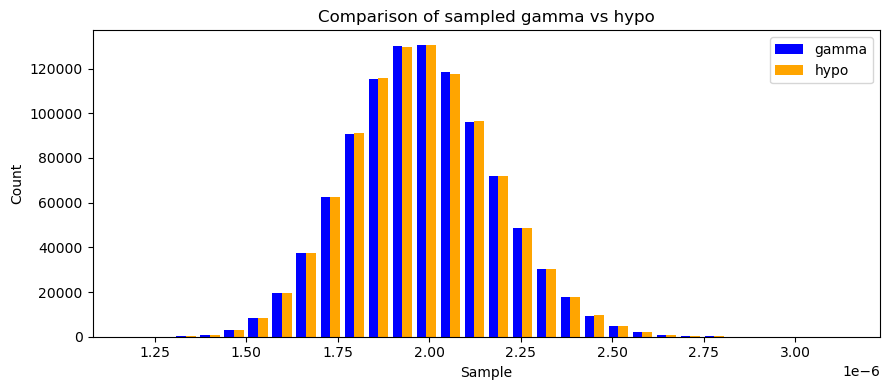

In [2]:
from math import sqrt
import numpy as np
import sys
sys.path.append('C:/Dropbox/src/python/')
import gamma

n = 10**4
k = round(sqrt(n))
c = 2
trials = 10**6
seed = 2
figsize = (9,4)

# print(f'{k=}')
rng = np.random.default_rng(seed)
gammas = gamma.gammas_matching_hypo(n, k, c, 1)
# print(f'{gammas=}')
gammas_samples = gamma.sample_gammas_sum(rng, gammas, trials)
# gammas_samples = erlang.sample_hypo(rng, n, k, c, trials)
hypo_samples = gamma.sample_hypo(rng, n, k, c, trials)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=figsize)

# Plot histograms with transparency (alpha) to see overlap
ax.hist([gammas_samples, hypo_samples], bins=30, histtype='bar', 
        label=['gamma', 'hypo'], 
        color=['blue', 'orange'],
        rwidth=0.8)

# Add labels and legend
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Comparison of sampled gamma vs hypo')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

gammas=array([[9.96951502e+00, 1.85906370e-04]])


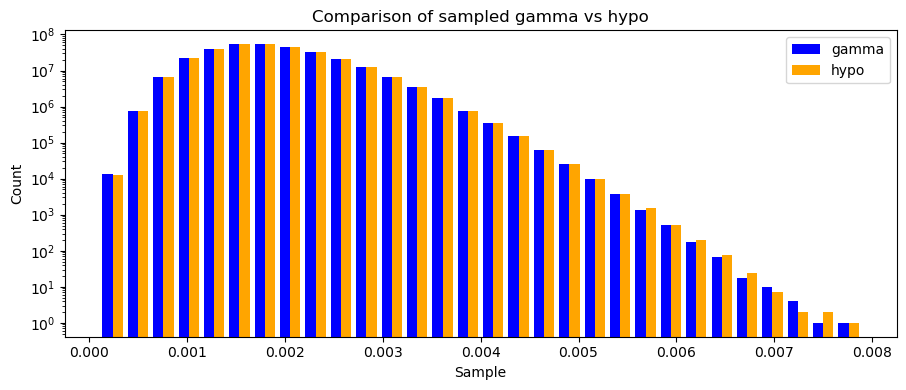

In [3]:
from math import sqrt
import numpy as np
import sys
sys.path.append('C:/Dropbox/src/python/')
import gamma

n = 10**2
k = round(sqrt(n))
c = 2
trials = 3*10**8
seed = 0

# print(f'{k=}')
rng = np.random.default_rng(seed)
gammas = gamma.gammas_matching_hypo(n, k, c, 1)
print(f'{gammas=}')
gammas_samples = gamma.sample_gammas_sum(rng, gammas, trials)
# gammas_samples = gamma.sample_hypo(rng, n, k, c, trials)
hypo_samples = gamma.sample_hypo(rng, n, k, c, trials)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=figsize)

# Plot histograms with transparency (alpha) to see overlap
ax.hist([gammas_samples, hypo_samples], bins=30, histtype='bar', 
        label=['gamma', 'hypo'], 
        color=['blue', 'orange'],
        rwidth=0.8)

# Add labels and legend
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Comparison of sampled gamma vs hypo')
ax.legend()

# Show the plot
plt.tight_layout()
plt.yscale('log')
# plt.show()

gammas=array([[9.96951502e+00, 1.85906370e-04]])


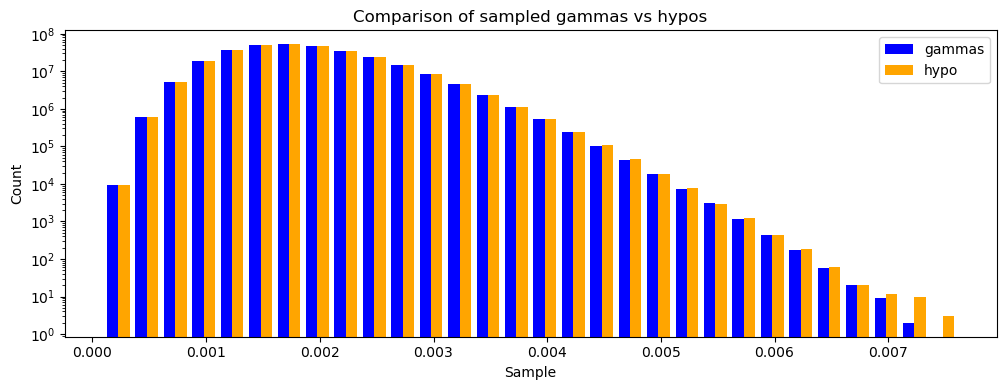

In [58]:
from math import sqrt
import numpy as np
import sys
sys.path.append('C:/Dropbox/src/python/')
import gamma

n = 10**2
k = round(sqrt(n))
c = 2
trials = 3*10**8
seed = 1

# print(f'{k=}')
rng = np.random.default_rng(seed)
gammas = gamma.gammas_matching_hypo(n, k, c, 1)
print(f'{gammas=}')
gammas_samples = gamma.sample_gammas_sum(rng, gammas, trials)
# gammas_samples = gamma.sample_hypo(rng, n, k, c, trials)
hypo_samples = gamma.sample_hypo(rng, n, k, c, trials)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=figsize)

# Plot histograms with transparency (alpha) to see overlap
ax.hist([gammas_samples, hypo_samples], bins=30, histtype='bar', 
        label=['gamma', 'hypo'], 
        color=['blue', 'orange'],
        rwidth=0.8)

# Add labels and legend
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Comparison of sampled gamma vs hypo')
ax.legend()

# Show the plot
plt.tight_layout()
plt.yscale('log')
# plt.show()

gammas=array([[9.96951502e+00, 1.85906370e-04]])


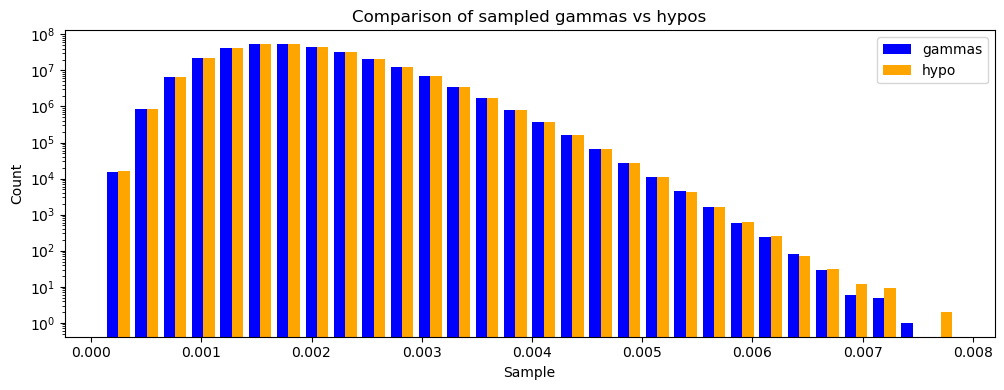

In [59]:
from math import sqrt
import numpy as np
import sys
sys.path.append('C:/Dropbox/src/python/')
import gamma

n = 10**2
k = round(sqrt(n))
c = 2
trials = 3*10**8
seed = 1

# print(f'{k=}')
rng = np.random.default_rng(seed)
gammas = gamma.gammas_matching_hypo(n, k, c, 1)
print(f'{gammas=}')
# gammas_samples = gamma.sample_gammas_sum(rng, gammas, trials)
gammas_samples = gamma.sample_hypo(rng, n, k, c, trials)
hypo_samples = gamma.sample_hypo(rng, n, k, c, trials)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=figsize)

# Plot histograms with transparency (alpha) to see overlap
ax.hist([gammas_samples, hypo_samples], bins=30, histtype='bar', 
        label=['gamma', 'hypo'], 
        color=['blue', 'orange'],
        rwidth=0.8)

# Add labels and legend
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Comparison of sampled gamma vs hypo')
ax.legend()

# Show the plot
plt.tight_layout()
plt.yscale('log')
# plt.show()

In [1]:
from math import sqrt
import numpy as np
import sys
sys.path.append('C:/Dropbox/src/python/')
import gamma

n = 10**2
k = round(sqrt(n))
c = 2
trials = 5*10**7
seed = 1

# print(f'{k=}')
rng = np.random.default_rng(seed)
gammas = gamma.gammas_matching_hypo(n, k, c, 1)
print(f'{gammas=}')
# gammas_samples = gamma.sample_gammas_sum(rng, gammas, trials)
gammas_samples = gamma.sample_hypo(rng, n, k, c, trials)
hypo_samples = gamma.sample_hypo(rng, n, k, c, trials)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))

# Plot histograms with transparency (alpha) to see overlap
ax.hist([gammas_samples, hypo_samples], bins=30, histtype='bar', 
        label=['gammas', 'hypo'], 
        color=['blue', 'orange'],
        rwidth=0.8)

# Add labels and legend
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Comparison of sampled gammas vs hypos')
ax.legend()

# Show the plot
plt.tight_layout()
plt.yscale('log')
# plt.show()

gammas=array([[9.96951502e+00, 1.85906370e-04]])
a
b
c
a
b
c


In [1]:
from scipy.special import polygamma
def var_hypo2(n, k):
    return 4 * k * (k - 2 * k * n - 2 * n * (n - 1)) / ((n - 1) * (n + k - 1)) ** 2 + \
        8 * (polygamma(1, n - 1) - polygamma(1, n + k - 1))
n = 10**5
k = 31
v = var_hypo2(n, k)
print(v)
print(polygamma(1, n - 1) - polygamma(1, n + k - 1))
print(4 * k * (k - 2 * k * n - 2 * n * (n - 1)) / ((n - 1) * (n + k - 1)) ** 2)

1.238484591616445e-18
3.0991322566042333e-09
-2.4793058051595382e-08


In [2]:
from math import sqrt
import sys
sys.path.append('C:/Dropbox/src/python/')
import erlang

n = 10**6
k = round(sqrt(n))
c = 2
gammas = erlang.gammas_matching_hypo(n, k, c, 12)
mean_gammas = 0
var_gammas = 0
for shape, scale in gammas:
    print(f'{shape=} {scale=}')
    mean_gamma = shape*scale
    var_gamma = shape*scale**2
    mean_gammas += mean_gamma
    var_gammas += var_gamma
mean_hypo = erlang.mean_direct_np(n, k, c)
var_hypo = erlang.var_direct_np(n, k, c)
print(f'mean_hypo   = {mean_hypo}')
print(f'mean_gammas = {mean_gammas}')
print(f'var_hypo    = {var_hypo}')
print(f'var_gammas  = {var_gammas}')

shape=49.25362486431563 scale=3.3700373436454464e-12
shape=37.2290240433054 scale=4.45778556233642e-12
shape=11.736315405511656 scale=1.4138292793130553e-11
shape=-36.02123005616974 scale=-4.605726338280506e-12
shape=53.92270651467409 scale=3.0761883086605857e-12
shape=-16.425059262896838 scale=-1.0097307710935489e-11
shape=15.497202774635355 scale=1.0700083428231667e-11
shape=-71.92742857258942 scale=-2.305015732867291e-12
shape=29.18146359704719 scale=5.680535956304088e-12
shape=21.546426481475738 scale=7.692173871214248e-12
shape=-12.69681716311904 scale=-1.305141037222376e-11
shape=-92.47344033898419 scale=-1.791691645355941e-12
shape=0.02844687134838475 scale=2.806660784166633e-10
mean_hypo   = 1.998005992015976e-09
mean_gammas = 1.998005992015976e-09
var_hypo    = 3.992029273479708e-21
var_gammas  = 5.106625360990259e-21


In [2]:
from math import sqrt
import sys
sys.path.append('C:/Dropbox/src/python/')
from gamma import *

from mpmath import mp

mp.dps = 50

n = 10
k = 4
c = 4
print(mpf(mean_direct_np_gamma(n, k, c)))
print(mpf(mean_direct_np(n, k, c)))
print(mpf(mean_direct(n, k, c)))
print(mean_hypo(n, k, c, False))
print(mean_hypo(n, k, c, True))
print(mpf(var_direct_np_gamma(n, k, c)))
print(mpf(var_direct_np(n, k, c)))
print(mpf(var_direct(n, k, c)))
print(var_hypo(n, k, c, False))
print(var_hypo(n, k, c, True))

n = 10**12
k = round(sqrt(n))
# %timeit -n1 -r1 mean_hypo(n, k, c, False)
# %timeit -n1 -r1 mean_hypo(n, k, c, True)
# %timeit -n1 -r1 var_hypo(n, k, c, False)
# %timeit -n1 -r1 var_hypo(n, k, c, True)
%timeit mean_hypo(n, k, c, False)
%timeit mean_hypo(n, k, c, True)
%timeit var_hypo(n, k, c, False)
%timeit var_hypo(n, k, c, True)

0.011211011211011210134125271054017503047361969947815
0.011211011211011211868848747030824597459286451339722
0.011211011211011211868848747030824597459286451339722
0.011211011211011211011211011211011211011211011211011
0.011211011211011211011211011211011211011211011211011
0.000037895775491513068939427449910439804625639226287603
0.000037895775491513096044481762048050654811959248036146
0.00003789577549151308926821818401364794226537924259901
0.000037895775491513087250682988278725874463470201065939
0.000037895775491513087250682988278725874463470200990505
194 μs ± 6.31 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
187 μs ± 5.68 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.59 ms ± 290 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
494 μs ± 56.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
import mpmath.libmp
mpmath.libmp.BACKEND 

'gmpy'

In [ ]:
import numpy as np
from scipy.stats import erlang, expon
import math

def gamma_approx(n: int, k: int, c: int) -> tuple[float, float]:
    """
    Approximate hypoexponential distribution with rates 
    
    n choose c, n+1 choose c, ..., n+k-1 choose c

    with a Gamma distribution chosen to have equal mean and variance.

    Returns shape,scale parameters for Gamma distribution
    """
    mean = mean_hypo(n, k, c)
    var = var_hypo(n, k, c)
    shape = mean**2 / var
    scale = var / mean
    return shape, scale

n = 10**6
k = round(math.sqrt(n))
c = 2
%timeit -n1 -r1 var_hypo(n, k, c)
%timeit -n1 -r1 var_hypo2(n, k)
# shape, scale = gamma_approx(n, k, c)
# shape = float(shape)
# scale = float(scale)
# print(f'{shape=} {scale=}')
# print(f'{type(shape)=} {type(scale)=}')